# Heart disease prediction

![heart.jpg](heart.jpg)

### Introduction

* World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. 

### Dataset

* Sex: male or female(Nominal)
* Age: Age of the patient
* Current Smoker: whether or not the patient is a current smoker
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day
* BP Meds: whether or not the patient was on blood pressure medication
* Prevalent Stroke: whether or not the patient had previously had a stroke
* Prevalent Hyp: whether or not the patient was hypertensive
* Diabetes: whether or not the patient had diabetes
* Tot Chol: total cholesterol level
* Sys BP: systolic blood pressure
* Dia BP: diastolic blood pressure
* BMI: Body Mass Index
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level

#### Predict variable (desired target)

* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Common libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\migue\Documents\datasets_kaggle\heart_disease\heart.csv')
df.head(3)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


In [4]:
df.isnull().sum()

# there are some fields without data like: education, BP Meds, etc

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df["age"].describe()

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [6]:
corr_matrix = df.corr()
corr_matrix["TenYearCHD"].sort_values(ascending = False)
# According to the correlation data, the age is the most important variable into the heart risk attack

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

#### Age & risk
A heart attack risk for men is at age of 45 or older and for women at age 55 or older are more likely to have a heart attack than are younger. According to the next charts the data are coherent, as we can see there are more attacks older mens than for younger (50 - 55 years) and in the same case is for women (60 - 65 years).

- https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106#:~:text=Heart%20attack%20risk%20factors%20include,Tobacco.

<AxesSubplot:>

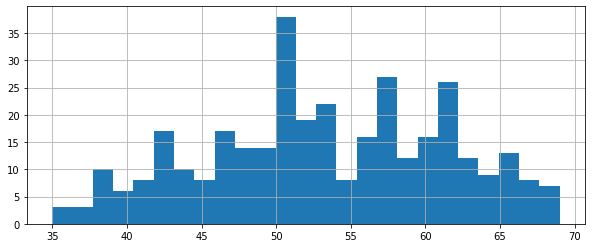

In [7]:
df[(df.TenYearCHD == 1) & (df.male == 1)].age.hist(bins = 25, figsize = (10,4))

<AxesSubplot:>

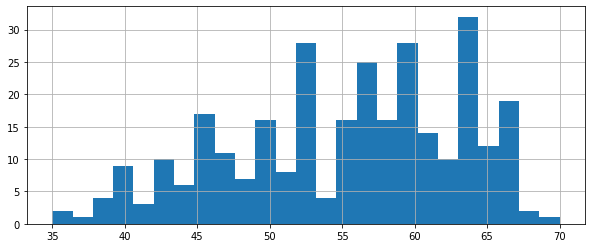

In [8]:
df[(df.TenYearCHD == 1) & (df.male == 0)].age.hist(bins = 25, figsize = (10,4))

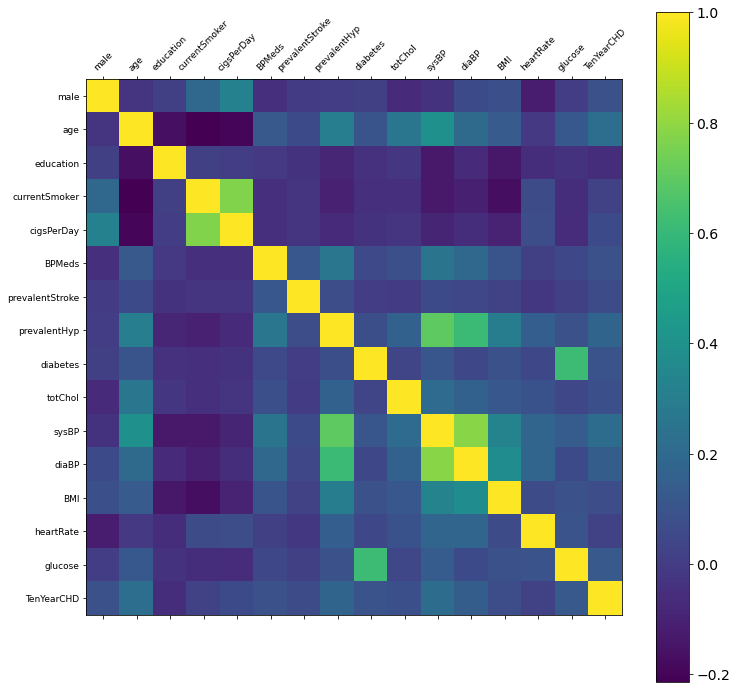

In [9]:
f = plt.figure(figsize = (12, 12))
plt.matshow(corr_matrix, fignum = f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize = 9, rotation = 45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize = 9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sysBP', ylabel='age'>,
        <AxesSubplot:xlabel='diaBP', ylabel='age'>,
        <AxesSubplot:xlabel='glucose', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sysBP'>,
        <AxesSubplot:xlabel='sysBP', ylabel='sysBP'>,
        <AxesSubplot:xlabel='diaBP', ylabel='sysBP'>,
        <AxesSubplot:xlabel='glucose', ylabel='sysBP'>],
       [<AxesSubplot:xlabel='age', ylabel='diaBP'>,
        <AxesSubplot:xlabel='sysBP', ylabel='diaBP'>,
        <AxesSubplot:xlabel='diaBP', ylabel='diaBP'>,
        <AxesSubplot:xlabel='glucose', ylabel='diaBP'>],
       [<AxesSubplot:xlabel='age', ylabel='glucose'>,
        <AxesSubplot:xlabel='sysBP', ylabel='glucose'>,
        <AxesSubplot:xlabel='diaBP', ylabel='glucose'>,
        <AxesSubplot:xlabel='glucose', ylabel='glucose'>]], dtype=object)

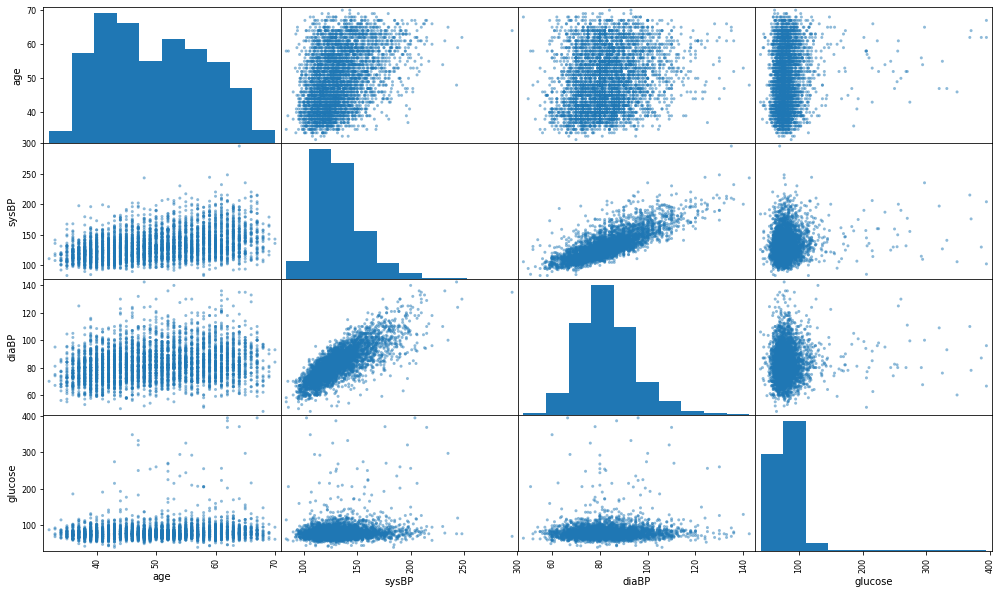

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["age", "sysBP", "diaBP", "glucose"]

scatter_matrix(df[attributes], figsize = (17, 10))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sysBP'}>],
       [<AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'glucose'}>]], dtype=object)

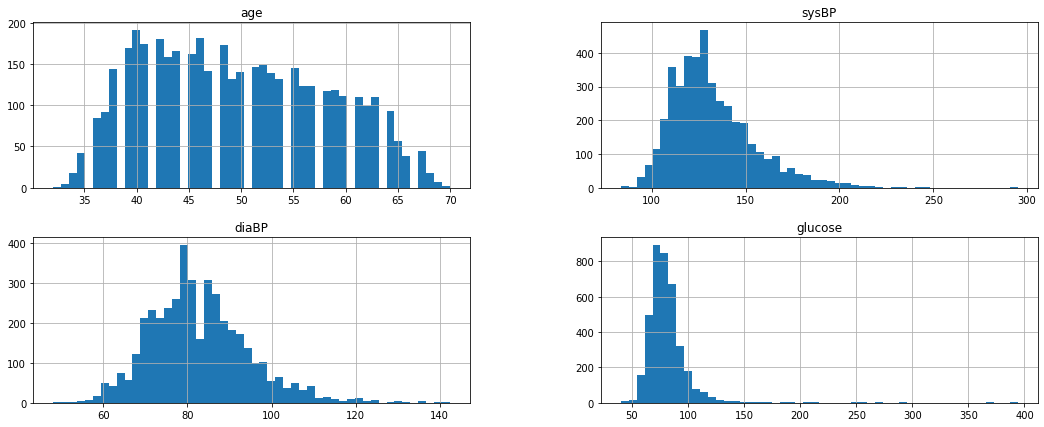

In [11]:
df[attributes].hist(bins = 50, figsize = (18,7))

#### For a more detail report, we'll use Pandas Profile

In [12]:
pp.ProfileReport(df)

### =====================================================================================
## Logistic regression
### =====================================================================================


### Define the model

In [13]:
# model selection
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

# regression model
from sklearn.linear_model import LogisticRegression

In [14]:
df_train, df_test = train_test_split(df, test_size = 0.2, 
                                     random_state = 42)

print(len(df), "total")
print(len(df_train), "train +", len(df_test),"test")

4238 total
3390 train + 848 test


In [15]:
y_train = df_train["TenYearCHD"]
df_train.drop(["TenYearCHD"], axis = 1, inplace = True)

c:\users\migue\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
preprocessing_data = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler()),
])

In [17]:
X_train = preprocessing_data.fit_transform(df_train)
X_train

array([[ 1.16861732, -1.11033368,  2.02618479, ..., -0.51053837,
        -0.83777307,  0.23717778],
       [-0.85571212,  0.87196279,  0.0291601 , ...,  1.57626559,
        -0.08342127,  0.54626826],
       [-0.85571212, -0.29409396, -0.96935225, ...,  0.27840502,
         0.58711366, -0.38100319],
       ...,
       [-0.85571212,  1.22177981,  0.0291601 , ..., -0.18181196,
         0.58711366, -0.02775692],
       [ 1.16861732, -1.22693936,  0.0291601 , ..., -0.32547758,
        -0.67013934, -0.86671681],
       [-0.85571212, -1.69336206,  0.0291601 , ..., -1.26539161,
         1.17383173, -0.07191271]])

### Train the model

In [18]:
log_reg = LogisticRegression(solver = "liblinear", 
                             C = 1.0, 
                             random_state = 42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [19]:
y_test = df_test["TenYearCHD"]
df_test.drop(["TenYearCHD"], axis = 1, inplace = True)

c:\users\migue\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
X_test = preprocessing_data.transform(df_test)
X_test

array([[ 1.16861732,  1.57159684, -0.96935225, ...,  0.31493017,
        -0.33487187,  0.19302199],
       [ 1.16861732, -0.52730531,  1.02767244, ...,  0.52190606,
         0.7547474 ,  0.06055464],
       [-0.85571212,  0.17232874, -0.96935225, ..., -1.36279203,
        -0.08342127,  0.63457983],
       ...,
       [ 1.16861732,  0.05572307, -0.96935225, ...,  0.35632535,
         0.7547474 ,  0.23717778],
       [ 1.16861732,  1.68820251,  1.02767244, ..., -0.22807716,
         1.59291607, 12.73326447],
       [ 1.16861732,  0.63875144,  1.02767244, ..., -0.38878785,
        -0.08342127, -0.42515897]])

### Prediction

In [21]:
y_predict = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

In [22]:
# probabilities predicted

pd.DataFrame(y_proba).rename(columns = {0 : "No", 1 : "Yes"}).head()

No       Yes
0  0.666562  0.333438
1  0.921719  0.078281
2  0.904376  0.095624
3  0.826893  0.173107
4  0.938296  0.061704

### Validate the results

In [23]:
from sklearn.metrics import precision_score, recall_score

print("Precision: " + str(precision_score(y_test,y_predict)))
print("Recall: " + str(recall_score(y_test,y_predict)))

Precision: 0.6
Recall: 0.07258064516129033


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)

print("=========================================")
print("Confussion matrix")
print(conf_matrix)
print("=========================================")
print("Accuracy")
print(accuracy)
print("=========================================")
print("Classification report\n")
print(report)

Confussion matrix
[[718   6]
 [115   9]]
Accuracy
0.8573113207547169
Classification report

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



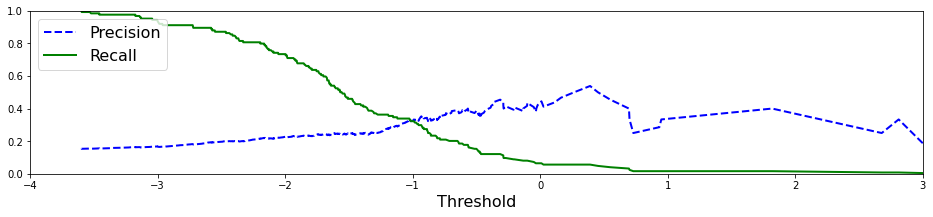

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
y_scores = cross_val_predict(log_reg, 
                             X_test, y_test, 
                             cv = 3, method = "decision_function")
  
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(16, 3))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4, 3])
plt.show()

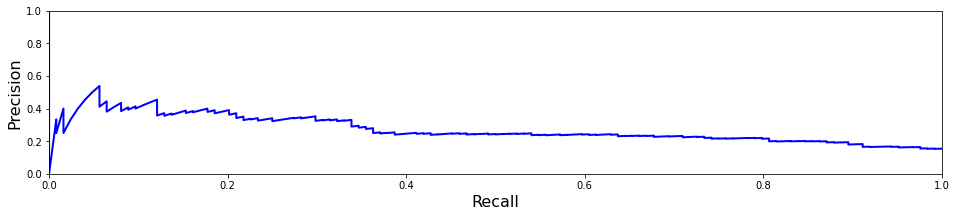

In [26]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth = 2)
    plt.xlabel("Recall", fontsize = 16)
    plt.ylabel("Precision", fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize = (16, 3))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### =====================================================================================
## Random Forest
### =====================================================================================

### Define & train the model

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 20, max_features = 6, random_state = 42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=20, random_state=42)

In [28]:
y_probas_forest = cross_val_predict(forest_clf, X_test, y_test,
                                    cv = 3, method = "predict_proba")

In [29]:
y_predict_forest = forest_clf.predict(X_test)

In [30]:
conf_matrix_forest = confusion_matrix(y_test, y_predict_forest)
accuracy_forest = accuracy_score(y_test, y_predict_forest)
report_forest = classification_report(y_test, y_predict_forest)

print("=========================================")
print("Confussion matrix")
print(conf_matrix_forest)
print("=========================================")
print("Accuracy")
print(accuracy_forest)
print("=========================================")
print("Classification report\n")
print(report_forest)

Confussion matrix
[[704  20]
 [115   9]]
Accuracy
0.8408018867924528
Classification report

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.31      0.07      0.12       124

    accuracy                           0.84       848
   macro avg       0.58      0.52      0.52       848
weighted avg       0.78      0.84      0.80       848



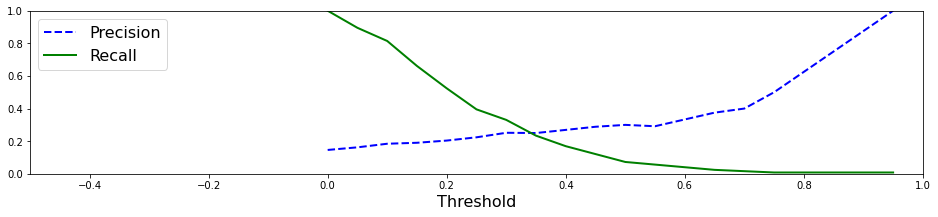

In [31]:
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_test, y_test, 
                                    cv = 3, method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_test, y_scores_forest)



plt.figure(figsize=(16, 3))
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.xlim([-0.5, 1])
plt.show()

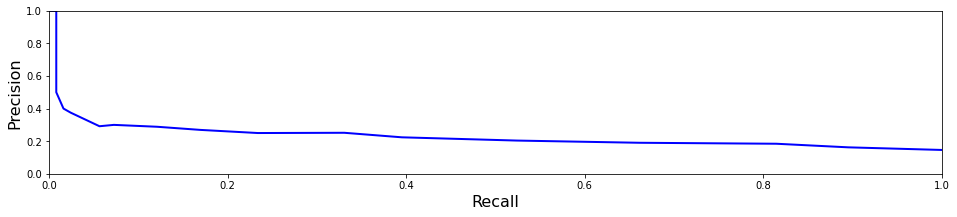

In [32]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth = 2)
    plt.xlabel("Recall", fontsize = 16)
    plt.ylabel("Precision", fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize = (16, 3))
plot_precision_vs_recall(precisions_forest, recalls_forest)
plt.show()

### =====================================================================================
## Support Vector Classifier
### =====================================================================================

In [33]:
from sklearn.svm import SVC

svm_clf = SVC(kernel = "poly", degree = 7,
              gamma = "auto", probability = True,
              random_state = 42)
svm_clf.fit(X_train, y_train)

SVC(degree=7, gamma='auto', kernel='poly', probability=True, random_state=42)

In [34]:
y_predict_SVM = svm_clf.predict(X_test)

In [35]:
conf_matrix_SVM = confusion_matrix(y_test, y_predict_SVM)
accuracy_SVM = accuracy_score(y_test, y_predict_SVM)
report_SVM = classification_report(y_test, y_predict_SVM)

print("=========================================")
print("Confussion matrix")
print(conf_matrix_SVM)
print("=========================================")
print("Accuracy")
print(accuracy_SVM)
print("=========================================")
print("Classification report\n")
print(report_SVM)

Confussion matrix
[[708  16]
 [109  15]]
Accuracy
0.8525943396226415
Classification report

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       724
           1       0.48      0.12      0.19       124

    accuracy                           0.85       848
   macro avg       0.68      0.55      0.56       848
weighted avg       0.81      0.85      0.81       848



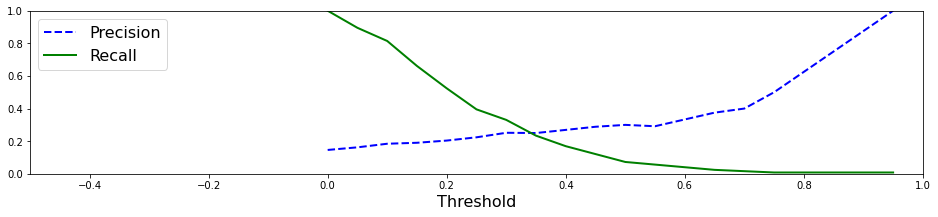

In [36]:
y_probas_SVM = cross_val_predict(svm_clf, X_test, y_test,
                                    cv = 3, method = "predict_proba")
y_scores_svm = y_probas_forest[:, 1]

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_test, y_scores_svm)



plt.figure(figsize=(16, 3))
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.xlim([-0.5, 1])
plt.show()

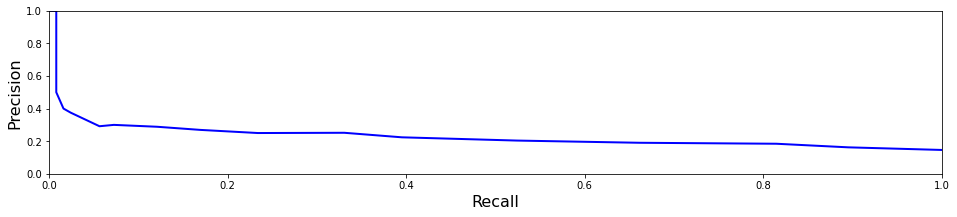

In [37]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth = 2)
    plt.xlabel("Recall", fontsize = 16)
    plt.ylabel("Precision", fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize = (16, 3))
plot_precision_vs_recall(precisions_svm, recalls_svm)
plt.show()

In [38]:
from sklearn.metrics import roc_curve

#fpr, tpr, thersholds = roc_curve(y_test, y_scores)
#fpr_forest, tpr_forest, thersholds_forest = roc_curve(y_test, y_scores_forest)
#fpr_svm, tpr_svm, thersholds_svm = roc_curve(y_test, y_scores_svm)
fpr, tpr, thersholds = roc_curve(y_test, y_predict)
fpr_forest, tpr_forest, thersholds_forest = roc_curve(y_test, y_predict_forest)
fpr_svm, tpr_svm, thersholds_svm = roc_curve(y_test, y_predict_SVM)

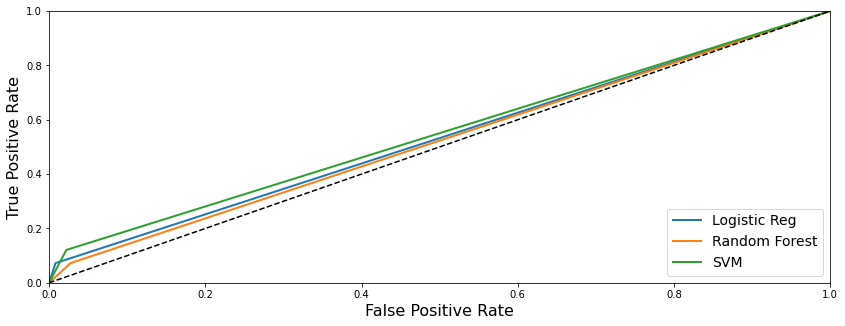

In [39]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)

plt.figure(figsize = (14,5))
plt.plot(fpr, tpr, linewidth = 2, label = "Logistic Reg")
plt.plot(fpr_forest, tpr_forest, linewidth = 2, label = "Random Forest")
plt.plot(fpr_svm, tpr_svm, linewidth = 2, label = "SVM")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.legend(loc = "lower right", fontsize = 14)
plt.show()

In [40]:
algorithm = {
    "Logistic" : accuracy,
    "Random Forest" : accuracy_forest,
    "SVM" : accuracy_SVM
}

In [41]:
pd.DataFrame(algorithm.items(), columns = ["algorithm", "accuracy"])

algorithm  accuracy
0       Logistic  0.857311
1  Random Forest  0.840802
2            SVM  0.852594

### Conclusions

- As we can see in the above execise there are many different classification algorithms with different features for each one, at the final the accuracy is similar amog Logistic, Random Forest & SVM but the most important thing in this case is the recall parameter.

- Recall: the ratio of positive instance that are correctly detected, in this exercise the most important thing is to detect the positive cases in order to prevent the disease

- As we can see in the results the recall is very low to create a good classificier, maybe in apparence the accurancy is good but the recall is too low and as we said it before, in this case the most important thing is to detect the positive cases

- Maybe the dataset has many features but the issue is the correlation amog them, there no a relation very strong amog them and maybe adding one feature more will be helpful like polynomial as we can did it in the SVM.

- At the final the Random Forest is the poorest classifier and the recall is near to a random classifier, 0.5, as we plot it in the last chart